In [5]:
import tensorflow as tf 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras

<img src='Dataset.png' />

In [6]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 44s 0us/step


In [7]:
print(f"Shape of X_train :{X_train.shape}")
print(f"Shape of X_test :{X_test.shape}")
print(f"Shape of y_train :{y_train.shape}")
print(f"Shape of y_test :{y_test.shape}")

Shape of X_train :(50000, 32, 32, 3)
Shape of X_test :(10000, 32, 32, 3)
Shape of y_train :(50000, 1)
Shape of y_test :(10000, 1)


In X, the last three numbers signify the Red, Green, Blue value of the image

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
def showImage(ImageTuple):
    plt.imshow(ImageTuple)

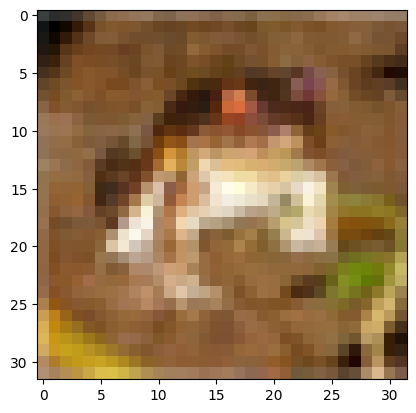

In [10]:
showImage(X_train[0])

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train[0][0]

6

In [13]:

output = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def WhatImage(n):
    return output[n]

In [14]:
WhatImage(y_train[0][0])

'frog'

### data scaling

Its always better to have a look at your data before doing anything

In [15]:
X_train[0]   # As data exists between 0 and 255, we can divide it by 255 to move it between 0 to 1

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
X_train = X_train/255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [17]:
X_test = X_test /255

In [18]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Lets do one hot encoding, to make the data binary, Theres a keras function called categorical to transform data to OHE

In [19]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [20]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
y_train_categorical.shape

(50000, 10)

## Lets train the model

1. We need to flatten the image data which is in the form of 32*32*3 = 
2. 

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')  # Size of final y
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train_categorical,epochs=50)

2024-01-03 00:06:01.936093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2024-01-03 00:06:03.345135: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.9758 - accuracy: 0.2909
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7986 - accuracy: 0.3635
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7240 - accuracy: 0.3908
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6658 - accuracy: 0.4134
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6167 - accuracy: 0.4286
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5758 - accuracy: 0.4426
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5413 - accuracy: 0.4572
Epoch 8/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5111 - accuracy: 0.4627
Epoch 9/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4833 - accuracy: 0.4791
Epoch 10/50
1563/1563 [==============================] - 19s 12m

In [31]:
prediction =  model.predict(X_test)
zeroY, firstY, secondY = prediction[0] , prediction[1] , prediction[2]

313/313 [==============================] - 4s 12ms/step


In [32]:
zeroY

array([0.2601266 , 0.51529723, 0.6909114 , 0.98961836, 0.6994519 ,
       0.89155054, 0.5607171 , 0.00156992, 0.4423403 , 0.2787041 ],
      dtype=float32)

It is the prediction of which has the highest percentage

In [34]:
zero_pred = np.argmax(zeroY)
zero_pred

3

In [37]:
WhatImage(zero_pred)

'cat'

In [43]:
WhatImage(y_test[0][0])

'cat'

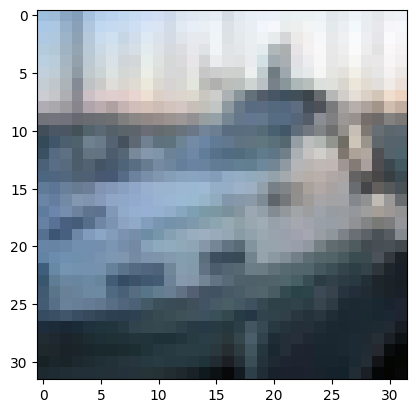

In [50]:
showImage(X_test[2])

In [52]:
WhatImage(np.argmax(secondY))

'airplane'

In [53]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 3s 9ms/step - loss: 1.3110 - accuracy: 0.5469


[1.3110222816467285, 0.5468999743461609]